<a href="https://colab.research.google.com/github/Manversajjad/Taxi_dataset/blob/main/Taxi_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider that you are a data analyst in Uber, which has recently incorporated a taxi service for its customers. To launch the service smoothly, the management wants to ensure that the business model is accurate. For that, it wants to analyze the taxi service data of 2019.

Answer these questions to get insight into taxi services in the year 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxi = pd.read_csv(r'/content/taxis.csv')
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Problem - I
Which of the following is the least affected by the distance traveled by a taxi on a particular trip?<br><br>

a.   Fare<br>
b.   Tip<br>
c.   Toll charges<br>
d.   Total bill

In [7]:
# Select only numeric columns
numeric_taxi = taxi.select_dtypes(include=['number'])
# Calculate correlation
txi = numeric_taxi.corr()
print(txi)



            passengers  distance      fare       tip     tolls     total
passengers    1.000000  0.009411  0.007637  0.021099 -0.002903  0.015708
distance      0.009411  1.000000  0.920108  0.452589  0.635267  0.904676
fare          0.007637  0.920108  1.000000  0.488612  0.609307  0.974358
tip           0.021099  0.452589  0.488612  1.000000  0.413619  0.646186
tolls        -0.002903  0.635267  0.609307  0.413619  1.000000  0.683142
total         0.015708  0.904676  0.974358  0.646186  0.683142  1.000000


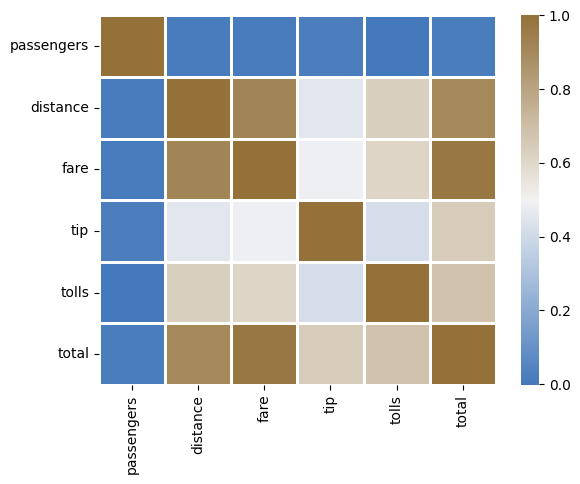

In [12]:
txi_diverging = sns.diverging_palette(250,55, as_cmap=True)

txi_heatmap = sns.heatmap(data=txi, cmap=txi_diverging, linewidths=1)

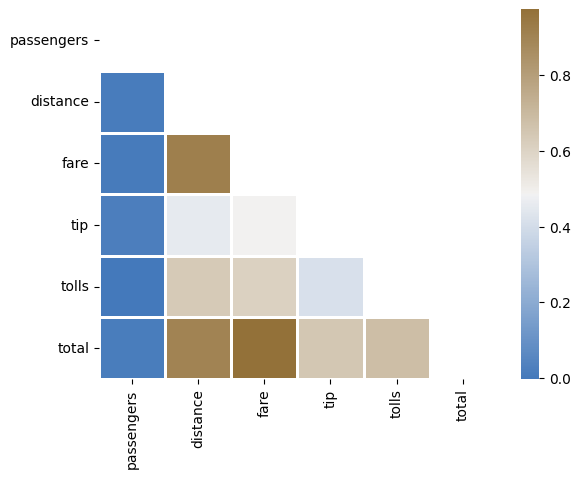

In [11]:
txi_diverging = sns.diverging_palette(250,55, as_cmap=True)
mask_1 = np.triu(np.ones_like(txi, dtype=bool))
txi_heatmap = sns.heatmap(data=txi, mask=mask_1, cmap=txi_diverging, linewidths=1)

## Problem - II
The two variables in which of these options have the highest correlation?<br><br>

a.   Fare and distance<br>
b.   Total and distance<br>
c.   Fare and total<br>
d.   Tolls and total<br>

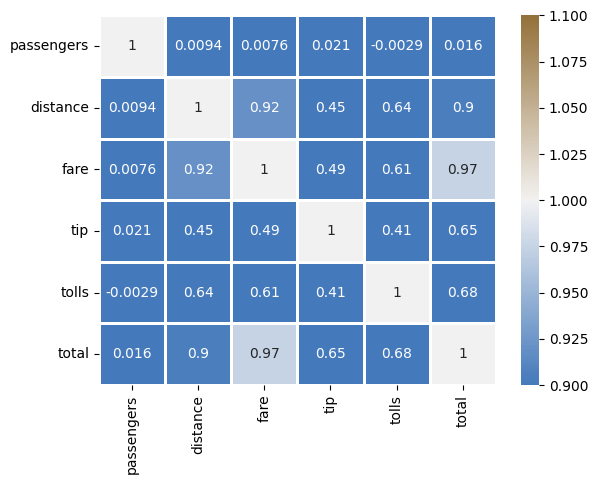

In [14]:
# a. Fare and distance - 0.920108
# b. Total and distance - 0.904676
# c. Fare and total - 0.974358
# d. Tolls and total - 0.683142

# The highest correlation is Fare and Total with the value of 0.974358

txi_diverging = sns.diverging_palette(250,55, as_cmap=True)

txi_heatmap = sns.heatmap(data=txi, cmap=txi_diverging, linewidths=1, annot=True, vmin=1, vmax=1)


## Problem - III
Which of these options correctly explains the difference between a two-way histogram and a heat map?<br><br>

a.   Color intensity is used to show the values in a two-way histogram, whereas colors are used to show the values in a heat map.<br>
b.   Two-way histograms have range values instead of categorical values plotted on their axes.<br>
c.   It is not possible to represent the density of data across the plot using heat maps, whereas it is possible to do so using two-way histograms.<br>
d.   None of the above.<br>

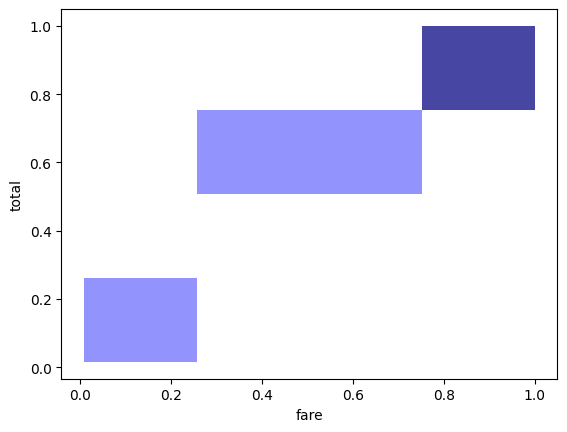

In [15]:
# Two-way histograms have range values instead of categorical values plotted on their axes.
hist_txi = sns.histplot(data=txi, x='fare', y='total', color='blue')